training and testing data

In [131]:
import pandas as pd
import re

In [132]:
def data_to_csv(input_file, output_file):
  open(output_file, 'w').close()  # clears file

  data = open(input_file).read().strip().split('\n')
  csv_file = open(output_file, 'a')
  for line in data:
    line = re.sub(r'\s+', ',', line.strip())
    csv_file.write(f'{line}\n')

In [133]:
# data_to_csv("housing.data", "data.csv")

In [134]:
housing = pd.read_csv('data.csv', header=None)
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                   'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [135]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [136]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [137]:
housing['CRIM']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [138]:
%matplotlib inline

In [139]:
import matplotlib as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

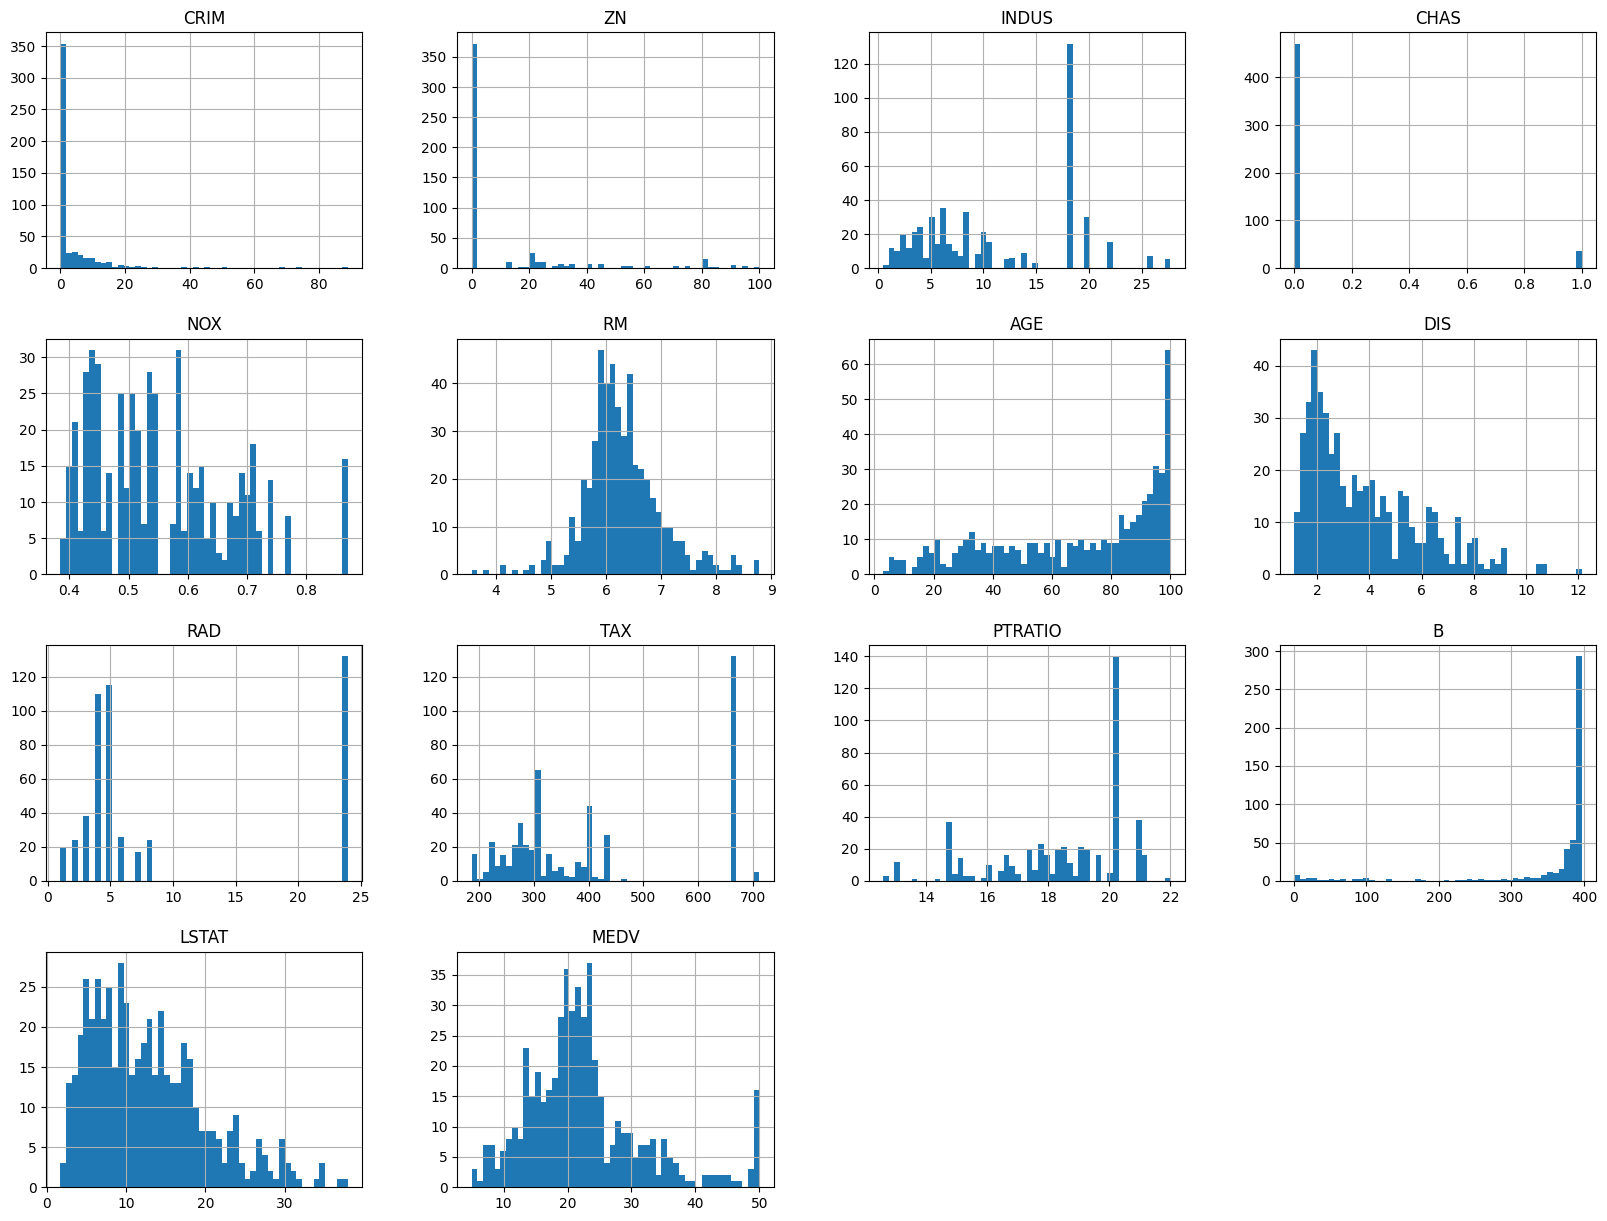

In [140]:
housing.hist(bins=50, figsize=(20, 15))

## Train-Test splitting

In [141]:
# for learning purpose

import numpy as np


def split_train_test(data, test_ratio):
  np.random.seed(42)
  shuffled = np.random.permutation(len(data))
  print(shuffled)
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled[:test_set_size]
  train_indices = shuffled[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [142]:
train_set, test_set = split_train_test(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [143]:
print(f'Rows in train_set {len(train_set)}\n Rows in test_set {len(test_set)}')

Rows in train_set 405
 Rows in test_set 101


In [144]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, random_state=42)
print(f'Rows in train_set {len(train_set)}\n Rows in test_set {len(test_set)}')

Rows in train_set 379
 Rows in test_set 127


In [145]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [146]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [147]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [148]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [149]:
95/7
376/28

13.571428571428571

13.428571428571429

## Looking for Correlations

In [150]:
corr_matrix = housing.corr()

In [151]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [152]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
# scatter_matrix(housing[attributes], figsize=(12, 8))

In [153]:
# housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

## Tryingout attribute combinations

In [154]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,31.061984


In [155]:
# housing.plot(kind='scatter', y='MEDV', x='TAXRM', alpha=0.8)

In [156]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing attributes

In [157]:
missing_housing_data = pd.read_csv('missing_data.csv', header=None)
missing_housing_data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

missing_housing_data.shape

(506, 14)

In [158]:
# option 1
a = missing_housing_data.dropna(subset=["RM"])
a.shape

(501, 14)

In [159]:
# option 2
# missing_housing_data.drop["RM", axis= 1].shape

In [160]:
median = missing_housing_data["RM"].median()
missing_housing_data["RM"].fillna(median)

0      6.209
1      6.421
2      6.209
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [161]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(missing_housing_data)

SimpleImputer(strategy='median')

In [162]:
imputer.statistics_

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

In [163]:
X = imputer.transform(missing_housing_data)

In [164]:
# housing_tr = pd.DataFrame(X, columns=housing.columns)

## Scikit-learn Design

* Estimators - eg: Imputer( fills Nan values), fit-parameters (fits data and calculates parameters)
* transformers - takes input and returns output based on the learnings
* predictors - LinearRegression model, score fun evaluates predictions.

## Feature scaling

* In general numerical in same scale make models perform well. - feature scaling

* Two types of scaling
  * min-max scaling (Normalization)
    * (value-min)/(max-min)
  * standardization
    * (value - mean)/std
  

## Creating pipeline

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [166]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model = LinearRegression()
# model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [206]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [207]:
prepared_data = my_pipeline.transform(some_data)

In [208]:
model.predict(prepared_data)

array([22.279, 25.498, 16.617, 23.458, 23.574])

In [209]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [210]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [211]:
mse
# overfitting

1.5071150717821764

## Using cross-validation 

In [212]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [213]:
rmse_scores

array([2.79129172, 2.77135774, 4.39050857, 2.62325169, 3.47382829,
       2.63481772, 4.55478383, 3.34304872, 3.21775453, 3.35974381])

In [214]:
def print_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())

In [215]:
print_scores(rmse_scores)

Scores: [2.79129172 2.77135774 4.39050857 2.62325169 3.47382829 2.63481772
 4.55478383 3.34304872 3.21775453 3.35974381]
Mean: 3.3160386616758983
Standard Deviation: 0.6513236246028831


### Linear regression
* Scores: [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
* Mean: 5.030437102767306
* Standard Deviation: 1.0607661158294837

### Decision Tree
* Scores: [4.10849803 5.65969921 5.65760873 3.53418842 4.04471878 2.84644515
 5.12640225 4.96593395 3.45010869 3.7694164 ]
* Mean: 4.3163019620498755
* Standard Deviation: 0.9284718269177623

### RandomForestRegressor
* Scores: [2.79129172 2.77135774 4.39050857 2.62325169 3.47382829 2.63481772
 4.55478383 3.34304872 3.21775453 3.35974381]
* Mean: 3.3160386616758983
* Standard Deviation: 0.6513236246028831

## Saving the model

In [216]:
from joblib import dump, load
dump(model, "Dragon.joblib")

['Dragon.joblib']

## Testing the model on test data

In [218]:
x_test = strat_test_set.drop('MEDV', axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [221]:
final_rmse
final_predictions

np.float64(2.9617869788090987)

array([24.483, 11.15 , 25.793, 21.995, 18.961, 14.845, 20.489, 14.378,
       32.577, 41.34 , 19.492, 11.849, 24.327, 26.422, 19.57 , 10.982,
       31.436, 14.189, 23.726, 19.022, 19.876, 17.887, 18.826, 22.169,
       18.47 , 31.854, 15.711, 33.164,  8.642, 33.544, 23.707, 21.138,
       22.732, 10.288, 21.063, 11.24 , 42.699, 24.304, 22.891, 41.052,
       24.03 , 30.494, 20.353, 20.702, 19.581, 32.976, 44.3  , 19.846,
       20.246, 21.657, 21.128, 14.49 , 21.584, 14.603, 24.874, 32.586,
       42.379, 29.699, 20.251, 20.559, 47.046,  9.993, 18.72 , 25.12 ,
       14.612, 32.307, 19.694, 17.845, 18.928, 34.384, 26.041, 22.542,
       21.215, 22.719, 34.447, 12.789, 15.663, 19.811, 20.641, 21.472,
       22.31 , 21.038, 13.696, 22.637, 20.557, 21.199, 13.562, 20.949,
       21.702, 23.211, 18.42 , 26.521,  7.256, 26.252, 19.619, 29.774,
       20.533, 30.717, 14.541, 26.453, 21.58 , 20.272])